# Life Expectancy Animation

Create animated scatterplots on global demography similar to the one in a famours talk by Hans Rosling.

Licensing Remark:

Based on free material from [GAPMINDER.ORG](https://www.gapminder.org/data/), CC-BY LICENSE

## Step 1: Download data

Three files in total:

1. life expectancy
2. fertility rate, total
3. population

can be downloaded from [here](https://www.gapminder.org/data/).

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imageio
import matplotlib.animation as animation

## Step 2: Load data

In [12]:
life_expectancy = pd.read_csv('life_expectancy_years.csv')
fertility = pd.read_csv('fertility_rate.csv')
population = pd.read_csv('population_total.csv')

print(life_expectancy.shape, fertility.shape, population.shape) # about 200 rows and more than 60 columns
print(life_expectancy.head(), fertility.head(), population.head()) 
print(life_expectancy.columns, '\n', fertility.columns, '\n', population.columns) # Column index consists of strings


(195, 302) (208, 62) (197, 302)
                country  1800  1801  1802  1803  1804  1805  1806  1807  1808  \
0           Afghanistan  28.2  28.2  28.2  28.2  28.2  28.2  28.1  28.1  28.1   
1                Angola  27.0  27.0  27.0  27.0  27.0  27.0  27.0  27.0  27.0   
2               Albania  35.4  35.4  35.4  35.4  35.4  35.4  35.4  35.4  35.4   
3               Andorra   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4  United Arab Emirates  30.7  30.7  30.7  30.7  30.7  30.7  30.7  30.7  30.7   

   ...  2091  2092  2093  2094  2095  2096  2097  2098  2099  2100  
0  ...  75.5  75.7  75.8  76.0  76.1  76.2  76.4  76.5  76.6  76.8  
1  ...  78.8  79.0  79.1  79.2  79.3  79.5  79.6  79.7  79.9  80.0  
2  ...  87.4  87.5  87.6  87.7  87.8  87.9  88.0  88.2  88.3  88.4  
3  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4  ...  82.4  82.5  82.6  82.7  82.8  82.9  83.0  83.1  83.2  83.3  

[5 rows x 302 columns]        country  1960  1961  1962  1963  196

## Step 3: Fertility and life expectancy in 2020

In [22]:
fertility_2020 = fertility[['country', '2020']]
life_expectancy_2020 = life_expectancy[['country', '2020']]

# Merge fertility and life expectancy data
fertility_life_expectancy_2020 = pd.merge(
    fertility_2020, 
    life_expectancy_2020, 
    on='country'
    ).rename(columns={
        '2020_x': 'fertility', 
        '2020_y': 'life_expectancy'
        }
    )
print(fertility_life_expectancy_2020)

                  country  fertility  life_expectancy
0             Afghanistan       4.18             63.4
1                  Angola       5.37             65.2
2                 Albania       1.58             77.9
3                 Andorra        NaN              NaN
4    United Arab Emirates       1.37             74.0
..                    ...        ...              ...
186                 Samoa       3.79             70.5
187                 Yemen       3.61             67.8
188          South Africa       2.36             64.3
189                Zambia       4.50             63.1
190              Zimbabwe       3.46             60.7

[191 rows x 3 columns]


## Step 4: Remove all missing values

In [24]:
fertility_life_expectancy_2020_dropna = fertility_life_expectancy_2020.dropna()
print(fertility_life_expectancy_2020_dropna)

                  country  fertility  life_expectancy
0             Afghanistan       4.18             63.4
1                  Angola       5.37             65.2
2                 Albania       1.58             77.9
4    United Arab Emirates       1.37             74.0
5               Argentina       2.23             74.6
..                    ...        ...              ...
186                 Samoa       3.79             70.5
187                 Yemen       3.61             67.8
188          South Africa       2.36             64.3
189                Zambia       4.50             63.1
190              Zimbabwe       3.46             60.7

[185 rows x 3 columns]


## Step 5: Draw scatterplot of fertility and life expectancy in 2020

AxesSubplot(0.125,0.11;0.775x0.77)


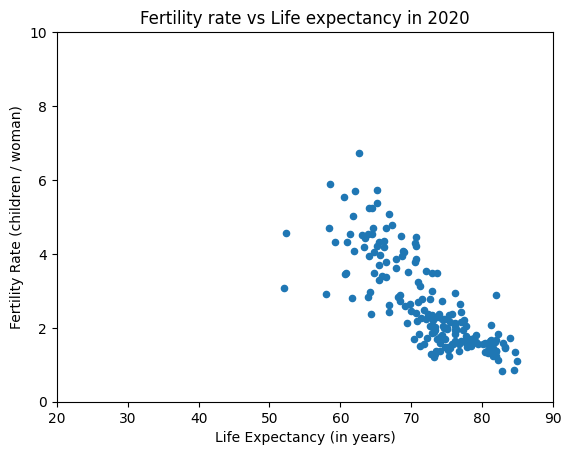

In [37]:
scatter_fertility_life_expectancy_2020 = fertility_life_expectancy_2020_dropna.plot(
    kind='scatter', 
    x='life_expectancy', 
    xlabel='Life Expectancy (in years)',
    xlim=(20, 90),
    y='fertility', 
    ylabel='Fertility Rate (children / woman)', 
    ylim=(0, 10),
    title='Fertility rate vs Life expectancy in 2020'
    )

print(scatter_fertility_life_expectancy_2020)

## Step 6: the same from above but for 1960

AxesSubplot(0.125,0.11;0.775x0.77)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


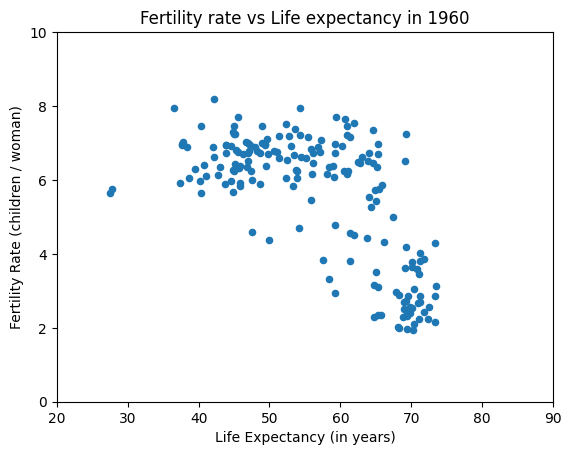

In [38]:
# Get fertility and life expectancy data from 1960
fertility_1960 = fertility[['country', '1960']]
life_expectancy_1960 = life_expectancy[['country', '1960']]

# Merge fertility and life expectancy data
fertility_life_expectancy_1960 = pd.merge(
    fertility_1960, 
    life_expectancy_1960, 
    on='country'
    ).rename(columns={
        '1960_x': 'fertility', 
        '1960_y': 'life_expectancy'
        }
    )

# Delete missing values
fertility_life_expectancy_1960_dropna = fertility_life_expectancy_1960.dropna()

# Create a scatter plot of fertility vs life expectancy
scatter_fertility_life_expectancy_1960 = fertility_life_expectancy_1960_dropna.plot(
    kind='scatter', 
    x='life_expectancy', 
    xlabel='Life Expectancy (in years)',
    xlim=(20, 90),
    y='fertility', 
    ylabel='Fertility Rate (children / woman)', 
    ylim=(0, 10),
    title='Fertility rate vs Life expectancy in 1960'
    )

print(scatter_fertility_life_expectancy_1960)

### What differences does one observe?

In general, you see the obivous differences between the 60s and 2020: the life expectancy is higher and the fertility rate is lower in 2020.

But the relationship also changed: the fertility rate is a little higher for the same life expectancy in 1960 than in 2020.

In the 1960s data, you also see a big frop at around 69 years in life expectancy. 

# Step 7: Write a function for scatterplots for any given year

AxesSubplot(0.125,0.11;0.775x0.77)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


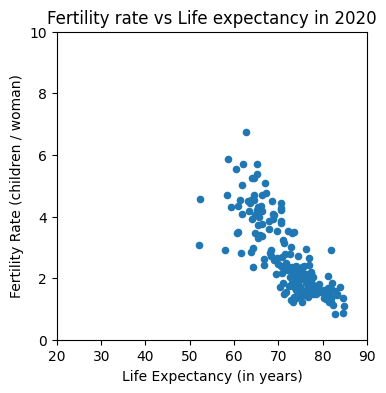

In [100]:
def fertility_over_life_expectancy(year):

    # Error handling & correctin input
    if type(year) != int:
        year = int(year)

    if year < 1960 or year > 2020:
        return 'Year must be between 1960 and 2020'

    year = str(year)
    

    # Get fertility and life expectancy data from year
    fertility_year = fertility[['country', year]]
    life_expectancy_year = life_expectancy[['country', year]]

    # Merge fertility and life expectancy data
    fertility_life_expectancy_year = pd.merge(
        fertility_year, 
        life_expectancy_year, 
        on='country'
        ).rename(columns={
            f'{year}_x': 'fertility', 
            f'{year}_y': 'life_expectancy'
            }
        )

    # Delete missing values
    fertility_life_expectancy_year_dropna = fertility_life_expectancy_year.dropna()

    # Create a scatter plot of fertility vs life expectancy
    scatter_fertility_life_expectancy_year = fertility_life_expectancy_year_dropna.plot(
        kind='scatter', 
        x='life_expectancy', 
        xlabel='Life Expectancy (in years)',
        xlim=(20, 90),
        y='fertility', 
        ylabel='Fertility Rate (children / woman)', 
        ylim=(0, 10),
        title=f'Fertility rate vs Life expectancy in {year}',
        figsize=(4, 4)
        )

    return scatter_fertility_life_expectancy_year

print(fertility_over_life_expectancy(2020))

# Step 8: Create scatterplot for each year and save in one file

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/Library/Frameworks/Python.framework/Versions/3.10/lib/p

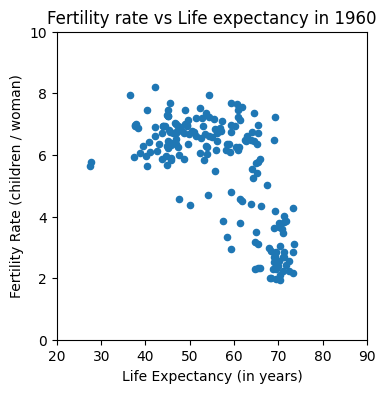

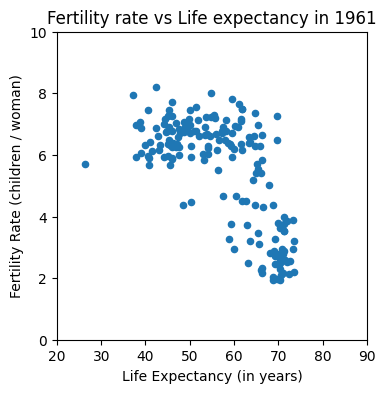

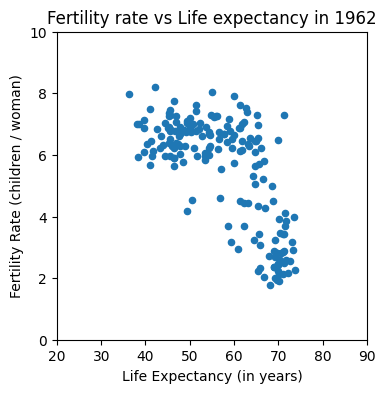

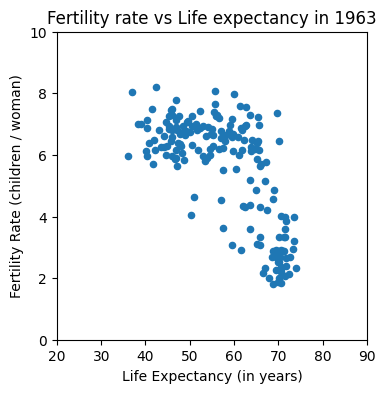

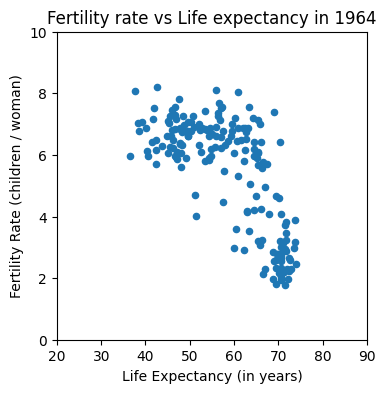

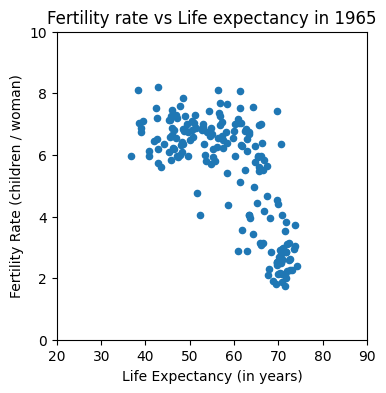

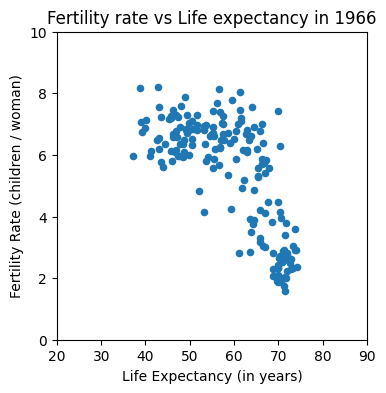

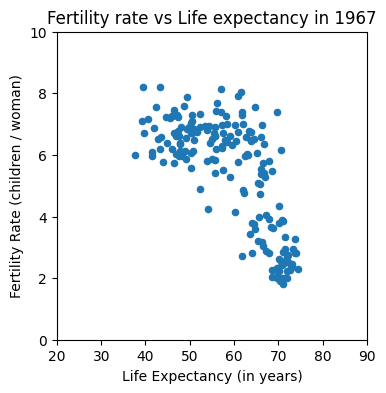

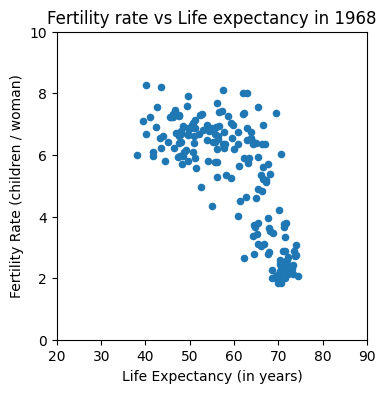

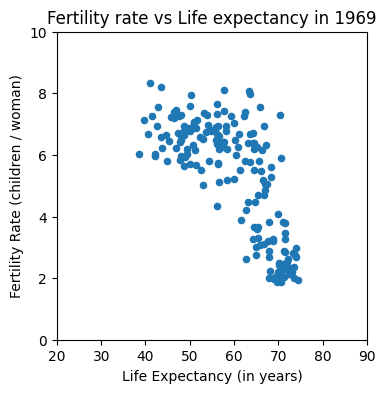

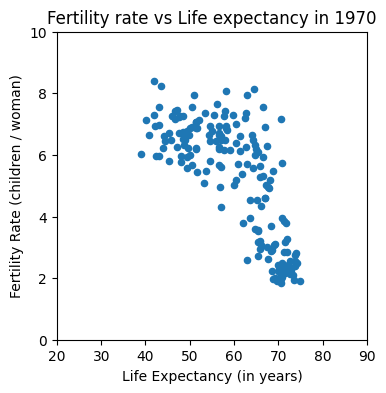

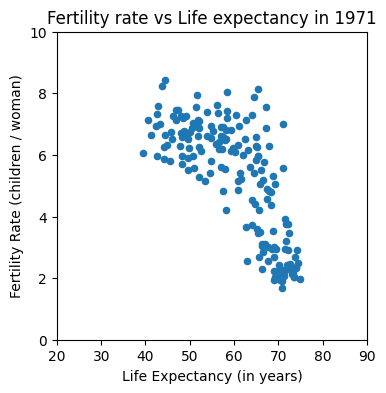

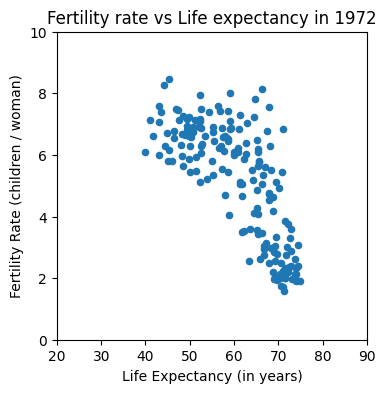

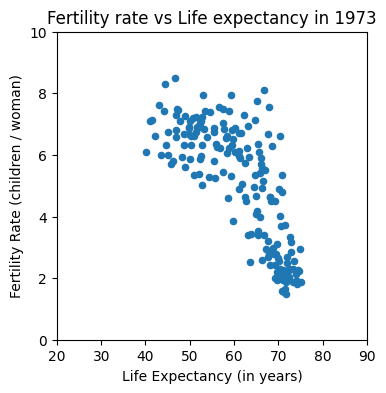

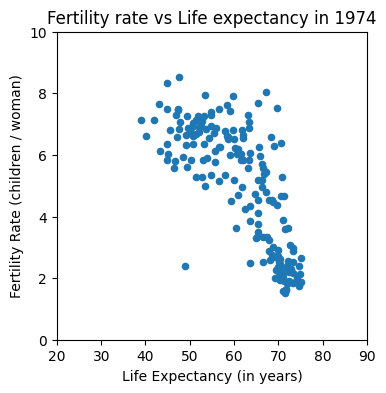

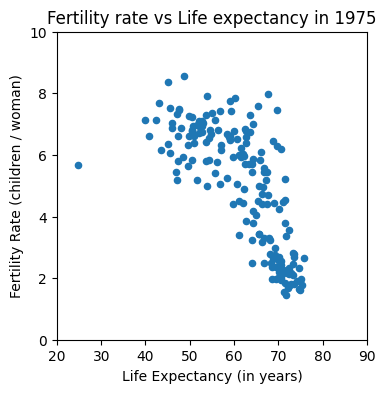

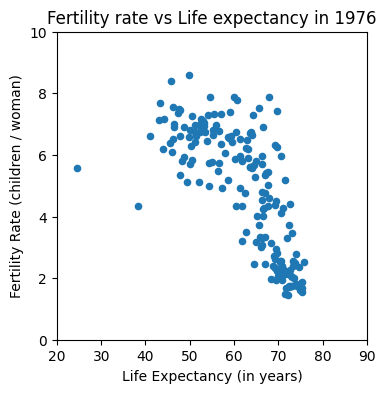

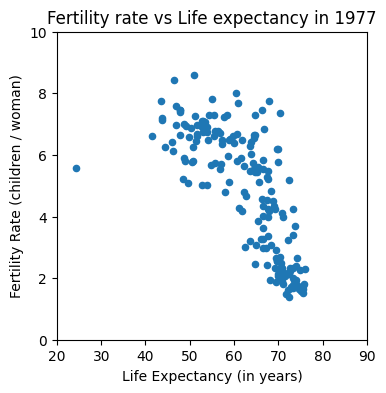

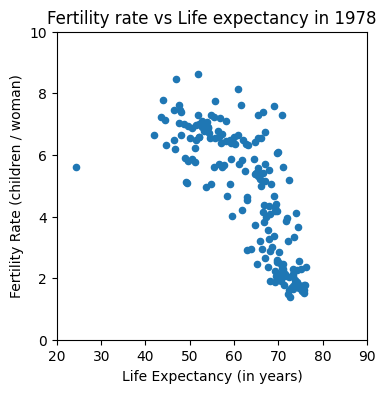

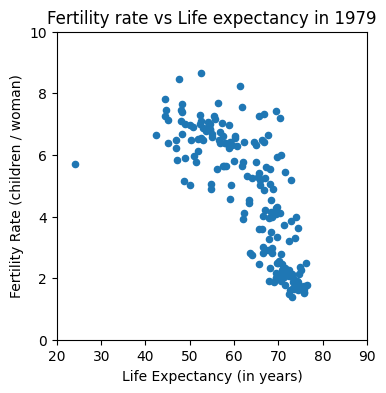

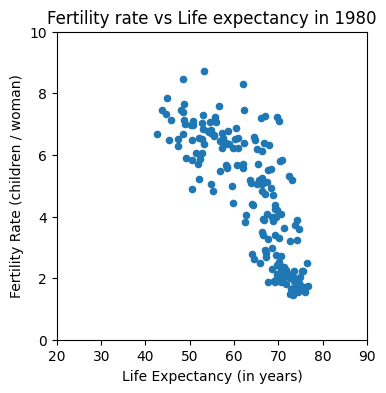

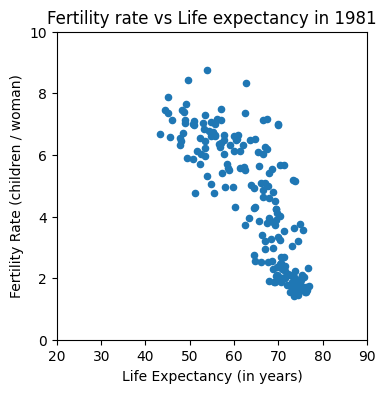

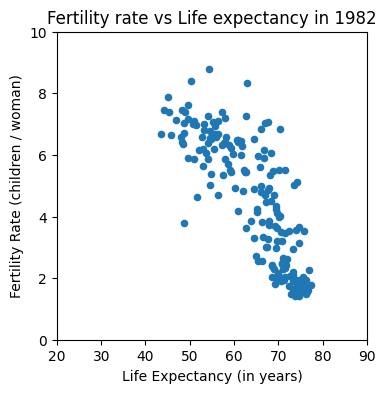

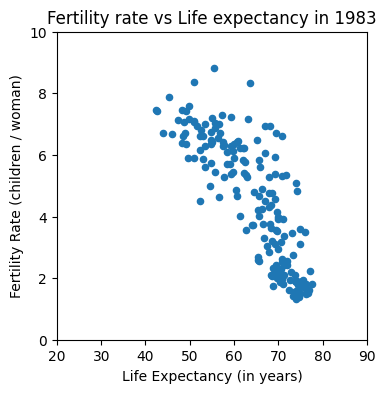

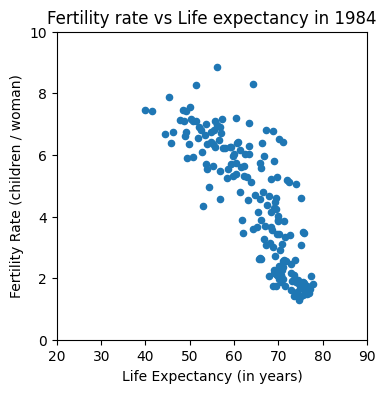

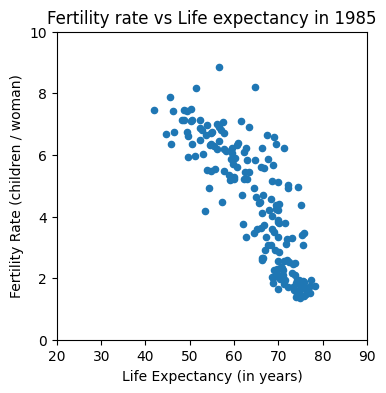

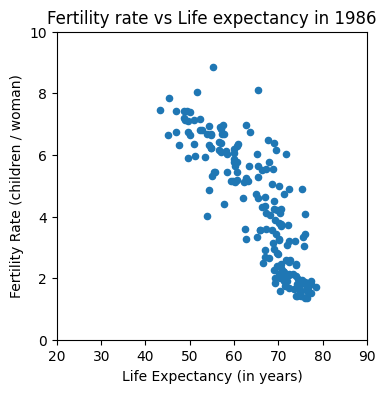

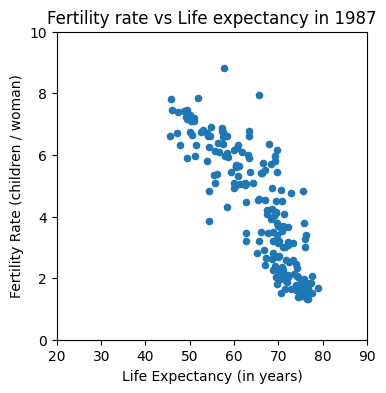

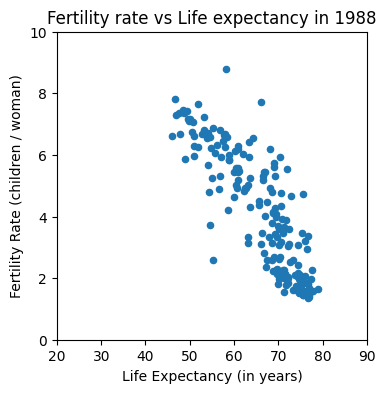

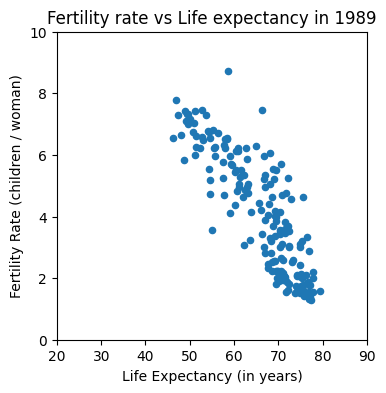

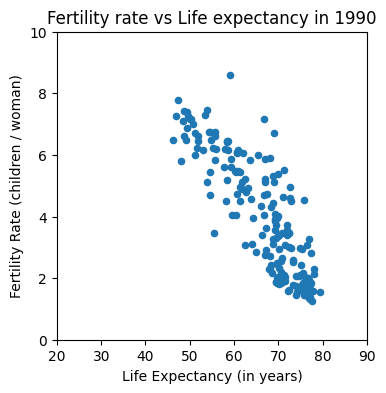

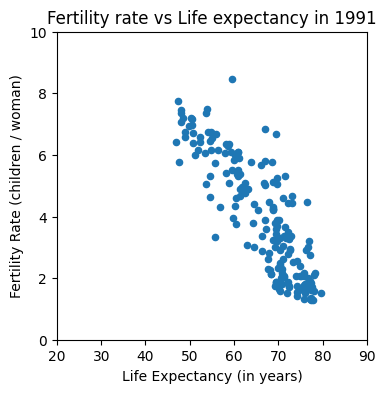

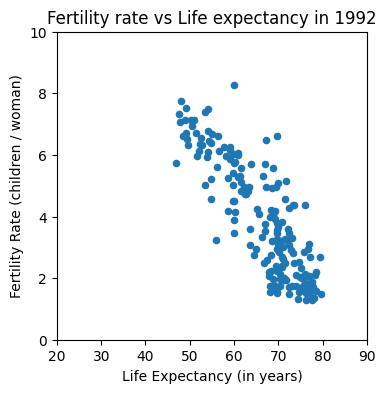

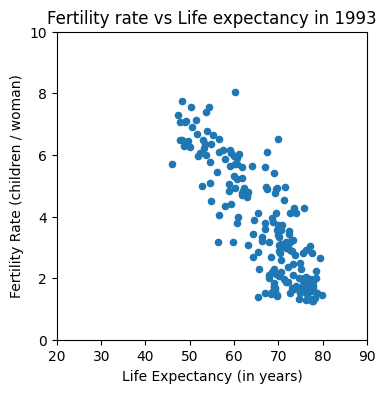

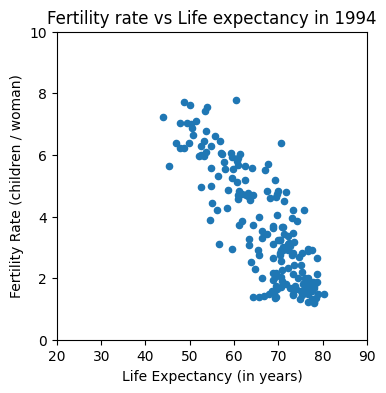

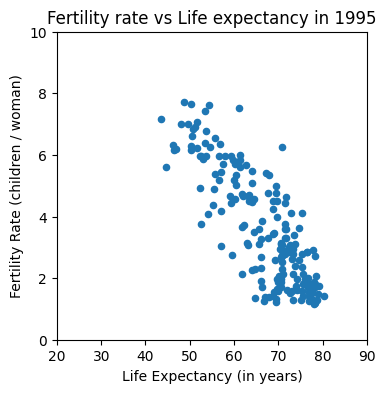

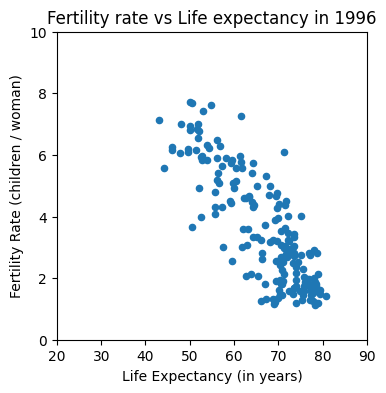

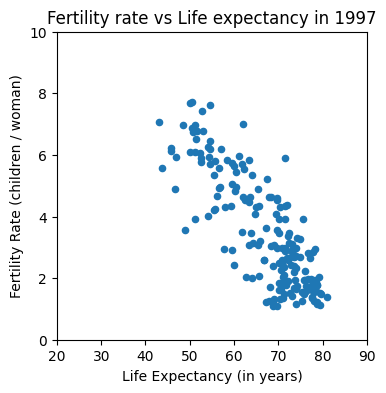

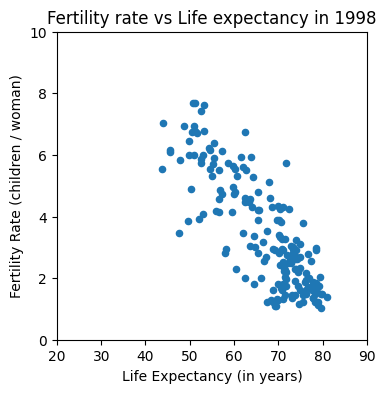

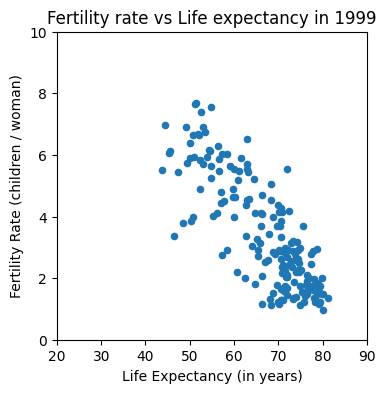

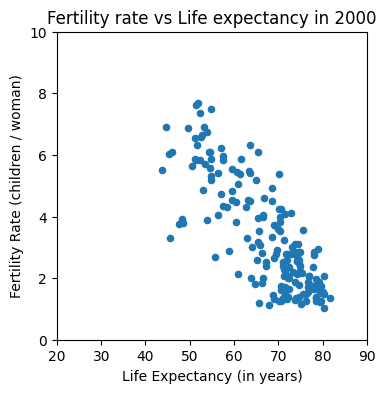

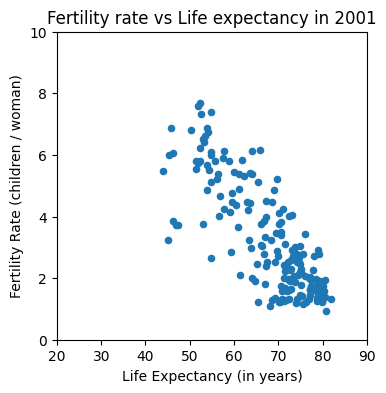

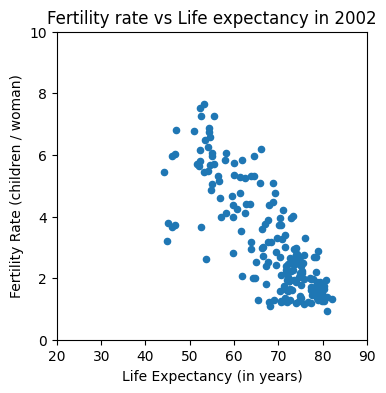

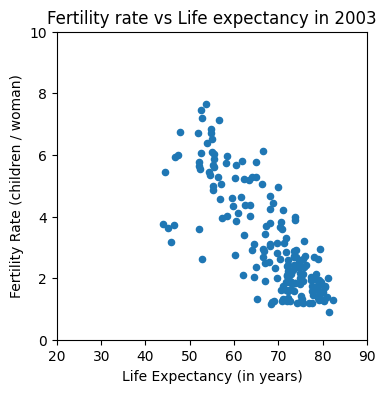

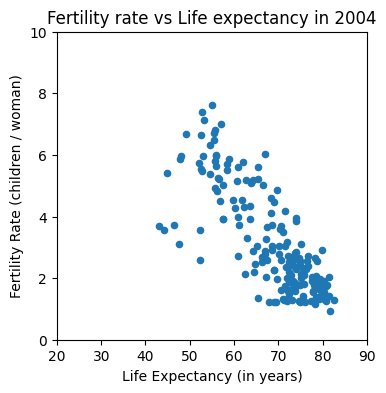

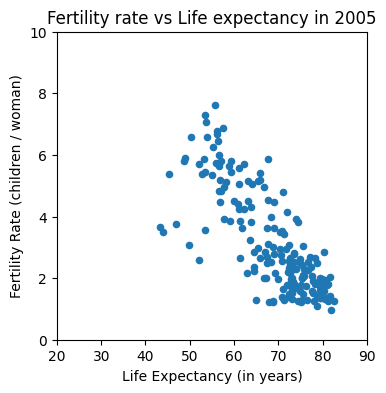

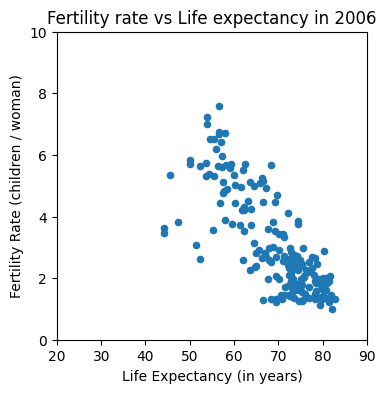

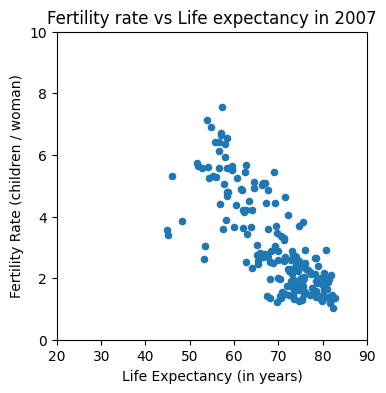

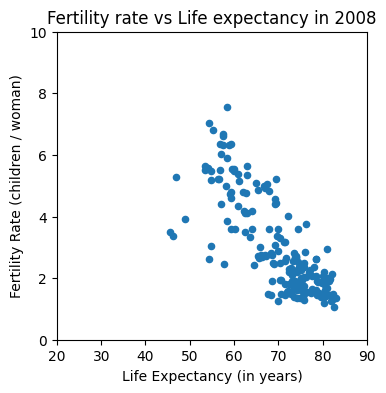

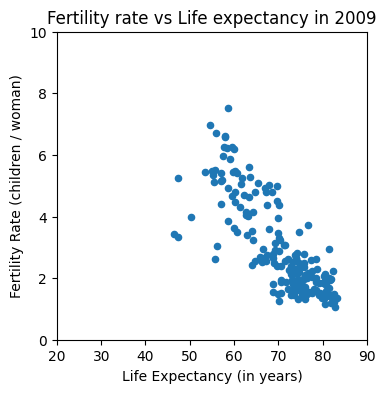

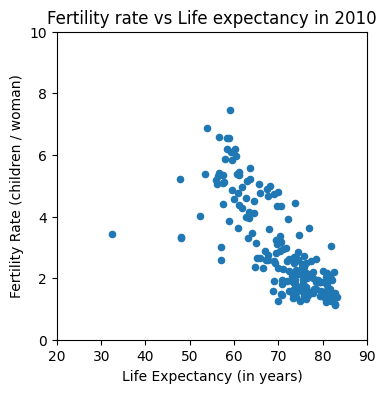

In [102]:
for year in range(1960, 2011):
    fig = fertility_over_life_expectancy(year).get_figure()
    fig.savefig(f'plots/fertility_life_expectancy_{year}.png')

# Step 9: Create an animation from the images

In [104]:
import imageio

plots = [
    imageio.imread(f'plots/fertility_life_expectancy_{year}.png') for year in range(1960, 2011)
]

imageio.mimsave('animation.gif', plots, fps=20)

/var/folders/hk/qr4prfd16lq2qs_kzhddm3zh0000gn/T/ipykernel_28029/1154801723.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imageio.imread(f'plots/fertility_life_expectancy_{year}.png') for year in range(1960, 2011)


# Step 10: read and model population data

# Step 11: control size of bubbles by population

# Step 12: color bubbles by continent